In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/train_ctrUa4K.csv")

In [ ]:
data.shape

(614, 13)

In [ ]:
data.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [ ]:

data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
features_with_na = [features for features in data.columns if data[features].isnull().sum()>1]

In [ ]:
features_with_na

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
for feature in features_with_na:
  print(feature, np.round(data[feature].isnull().mean(), 2),"% of missing values")

Gender 0.02 % of missing values
Married 0.0 % of missing values
Dependents 0.02 % of missing values
Self_Employed 0.05 % of missing values
LoanAmount 0.04 % of missing values
Loan_Amount_Term 0.02 % of missing values
Credit_History 0.08 % of missing values


In [ ]:
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'object']

In [ ]:
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
data[numerical_features].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [ ]:
data[numerical_features].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [ ]:
for features in numerical_features: print(features ,":", data[features].nunique())

ApplicantIncome : 505
CoapplicantIncome : 287
LoanAmount : 203
Loan_Amount_Term : 10
Credit_History : 2


In [ ]:
discrete_features = [feature for feature in numerical_features if len(data[feature].unique()) < 25]

In [ ]:
discrete_features

['Loan_Amount_Term', 'Credit_History']

In [ ]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [ ]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_features]

In [ ]:
continuous_feature

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [ ]:
data['LoanAmount'].mean()

146.41216216216216

In [ ]:
data['LoanAmount'].median()

128.0

In [ ]:
data['LoanAmount'].mode()

0    120.0
dtype: float64

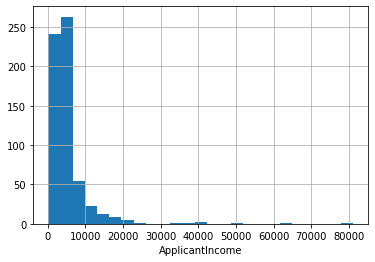

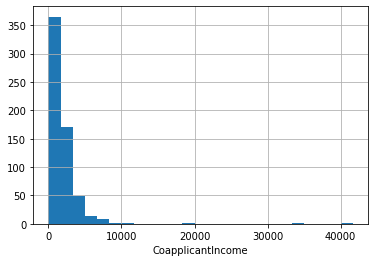

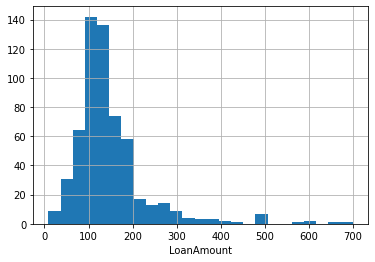

In [ ]:
for feature in continuous_feature:
  d = data.copy()
  d[feature].hist(bins = 25)
  plt.xlabel(feature)
  plt.show()

In [ ]:
for features in continuous_feature:
  data[features] = data[features].fillna(data[features].mean())

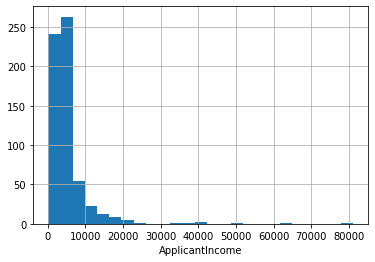

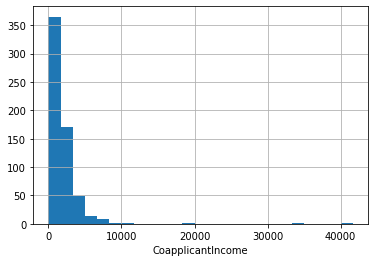

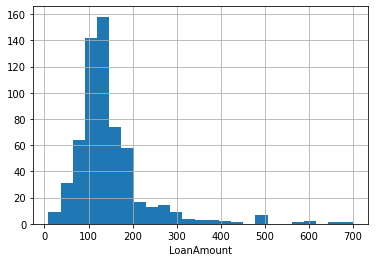

In [ ]:
for feature in continuous_feature:
  d = data.copy()
  d[feature].hist(bins = 25)
  plt.xlabel(feature)
  plt.show()

In [ ]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(0)

In [ ]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].ffill())

In [ ]:
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'object']

In [ ]:
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
for features in categorical_features:
  data[features] = data[features].fillna(data[features].ffill())

In [ ]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
for features in categorical_features:
  print(features, data[features].nunique(),'\n')

Loan_ID 614 

Gender 2 

Married 2 

Dependents 4 

Education 2 

Self_Employed 2 

Property_Area 3 

Loan_Status 2 



In [ ]:
x = data.drop(['Loan_ID','Loan_Status'], axis = 1)

In [ ]:
x_train = pd.get_dummies(x)
y_train = data['Loan_Status']

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(x_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dt = pd.read_csv("/content/test_lAUu6dG.csv")

In [ ]:
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
dt.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
for features in continuous_feature:
  dt[features] = dt[features].fillna(dt[features].mean())

In [ ]:
categorical_features.remove('Loan_Status')

In [ ]:
dt['Loan_Amount_Term'] = dt['Loan_Amount_Term'].fillna(0)

In [ ]:
dt['Credit_History'] = dt['Credit_History'].fillna(dt['Credit_History'].ffill())

In [ ]:
for features in categorical_features:
  dt[features] = dt[features].fillna(dt[features].ffill())

In [ ]:
x = dt.drop('Loan_ID', axis = 1)

In [ ]:
dt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
x_test =  pd.get_dummies(x)

In [ ]:
y = pd.read_csv("/content/sample_submission_49d68Cx.csv")
ya = y.drop('Loan_Status',axis = 1)
y_test = y.drop('Loan_ID',axis = 1)


# **Logistic Regression**

In [ ]:
y_pred = log_model.predict(x_test)

In [ ]:
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print('Confusion Matrix is :\n', confusion_matrix(y_test, y_pred))
print('Accuracy is : ', accuracy_score(y_test, y_pred))

Confusion Matrix is :
 [[ 63 304]
 [  0   0]]
Accuracy is :  0.17166212534059946


In [ ]:
ypred = pd.DataFrame(y_pred,columns = ['Loan_Status'])


In [ ]:
out= pd.concat([ya, ypred],axis = 1)


In [ ]:
out.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [ ]:
out.to_csv(r'Logistic_Regression.csv', index=False)

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
metric_k = []
neighbors = np.arange(3,15)

In [ ]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  classifier.fit(x_train, y_train)
  y_predictions = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_predictions)
  metric_k.append(acc)

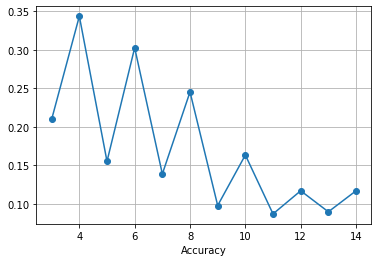

In [ ]:
plt.plot(neighbors, metric_k,'o-')
plt.xlabel("K-Value")
plt.xlabel("Accuracy")
plt.grid()

In [ ]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=4,metric='euclidean')
  classifier.fit(x_train, y_train)
  y_predictions = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_predictions)
  metric_k.append(acc)

In [ ]:
print('Confusion Matrix is :\n', confusion_matrix(y_test, y_predictions))
print('Accuracy is :', accuracy_score(y_test, y_predictions))

Confusion Matrix is :
 [[126 241]
 [  0   0]]
Accuracy is : 0.34332425068119893


In [ ]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=4,metric='euclidean')
  classifier.fit(x_train, y_train)
  y_predictions = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_predictions)
  metric_k.append(acc)

In [ ]:
print('Confusion Matrix is :\n', confusion_matrix(y_test, y_predictions))
print('Accuracy is :', accuracy_score(y_test, y_predictions))

Confusion Matrix is :
 [[126 241]
 [  0   0]]
Accuracy is : 0.34332425068119893


In [ ]:
ypred = pd.DataFrame(y_pred,columns = ['Loan_Status'])
out= pd.concat([ya, ypred],axis = 1)
out.to_csv(r'KNN.csv', index=False)

# **SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_cl = SVC(kernel='linear')
svm_cl = svm_cl.fit(x_train, y_train)
svm_pred = svm_cl.predict(x_test)


In [ ]:
print('Confusion Matrix is :\n', confusion_matrix(y_test, svm_pred))
print('Accuracy is :', accuracy_score(y_test, svm_pred))

Confusion Matrix is :
 [[ 58 309]
 [  0   0]]
Accuracy is : 0.15803814713896458


In [ ]:
svm_cl1 = SVC(kernel='rbf')
svm_cl1 = svm_cl1.fit(x_train, y_train)
svm_pred1 = svm_cl1.predict(x_test)

In [ ]:
print('Confusion Matrix is :\n', confusion_matrix(y_test, svm_pred1))
print('Accuracy is :', accuracy_score(y_test, svm_pred1))

Confusion Matrix is :
 [[  0 367]
 [  0   0]]
Accuracy is : 0.0


In [ ]:
ypred = pd.DataFrame(y_pred,columns = ['Loan_Status'])
out= pd.concat([ya, ypred],axis = 1)
out.to_csv(r'SVM.csv', index=False)

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_cls = DecisionTreeClassifier()
dt_cls = dt_cls.fit(x_train, y_train)
dt_pred = dt_cls.predict(x_test)

In [ ]:
print('Confusion Matrix is :\n', confusion_matrix(y_test, dt_pred))
print('Accuracy is :', accuracy_score(y_test, dt_pred))

Confusion Matrix is :
 [[132 235]
 [  0   0]]
Accuracy is : 0.35967302452316074


In [ ]:
ypred = pd.DataFrame(y_pred,columns = ['Loan_Status'])
out= pd.concat([ya, ypred],axis = 1)
out.to_csv(r'Decision_Tree.csv', index=False)

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train, y_train)
rf_pred = rf_cls.predict(x_test)

In [ ]:
print('Confusion Matrix is :\n', confusion_matrix(y_test, rf_pred))
print('Accuracy is :', accuracy_score(y_test, rf_pred))

Confusion Matrix is :
 [[ 74 293]
 [  0   0]]
Accuracy is : 0.2016348773841962


In [ ]:
ypred = pd.DataFrame(y_pred,columns = ['Loan_Status'])
out= pd.concat([ya, ypred],axis = 1)
out.to_csv(r'Random_Forest.csv', index=False)